In [10]:
import pandas as pd
from ete3 import Tree
import numpy as np

PATH = "/Users/aleksandradenisova/Laboratory/innovation/Inno_2025/initial_data/"

tree = Tree(f"{PATH}/tree_clootl.newick", format=1)

df_innovation = pd.read_excel(
    f"{PATH}/ALLBIRDTRAITS_Database_August_2024.xlsx",
    sheet_name="ALLBIRDTRAITS_Database_August_2",
)

df_innovation.head()

,Order,Family,Genus,Species,animal,BiogeographicRange,ResearchEffort,DietBreadth,HabitatBreadth,GenerationLength,...,Hand-Wing_index,Tail_length,Mass,Habitat,Habitat_density,Migration,Trophic_level,Trophic_niche,Primary_lifestyle,Range_size
0,CAPRIMULGIFORMES,TROCHILIDAE,Abeillia,Abeillia_abeillei,Abeillia_abeillei,several,0,2,1.674435,4.2,...,66.3,29.4,2.70,Forest,2.0,1.0,Herbivore,Nectarivore,Aerial,144610.40
1,PASSERIFORMES,SCOTOCERCIDAE,Abroscopus,Abroscopus_albogularis,Abroscopus_albogularis,Asia,1,1,1.672497,3.6,...,13.3,38.7,4.84,Forest,1.0,1.0,Carnivore,Invertivore,Insessorial,1704650.60
2,PASSERIFORMES,SCOTOCERCIDAE,Abroscopus,Abroscopus_schisticeps,Abroscopus_schisticeps,Asia,2,1,0.999724,3.6,...,16.1,47.5,4.70,Forest,1.0,1.0,Carnivore,Invertivore,Insessorial,909217.05
3,PASSERIFORMES,SCOTOCERCIDAE,Abroscopus,Abroscopus_superciliaris,Abroscopus_superciliaris,Asia,3,1,1.469690,3.6,...,12.7,42.4,6.48,Shrubland,1.0,1.0,Carnivore,Invertivore,Insessorial,2493437.47
4,GALLIFORMES,CRACIDAE,Aburria,Aburria_aburri,Aburria_aburri,South-America,7,1,1.870561,5.7,...,15.7,290.4,1405.08,Forest,1.0,1.0,Herbivore,Frugivore,Insessorial,139314.36


In [23]:
unique_species = set(df_innovation["Species"].unique())
sp_names_from_tree = set(tree.get_leaf_names())

print(f'Overlap between clootl tree and Innovation database: {len(sp_names_from_tree & unique_species)}')
# print(f'Species in Innovation database but not in clootl tree: {unique_species - sp_names_from_tree}')

print(f'Species in Innovation database but not in clootl tree: {len(unique_species - sp_names_from_tree)}')

Overlap between clootl tree and Innovation database: 7995
Species in Innovation database but not in clootl tree: 893


In [12]:
tax_df = pd.read_csv(f"{PATH}/taxonomy_table.csv")

In [13]:
tax_df["Birdlife_name"] = tax_df["Birdlife_name"].str.split(";")
tax_df = tax_df.explode("Birdlife_name")

not_in_tree_sp = {str(i).replace("_", " ") for i in unique_species - sp_names_from_tree}

df_match_ott = tax_df[
    tax_df["ott_name"].apply(lambda x: x in not_in_tree_sp) |
    tax_df["H_M_name"].apply(lambda x: x in not_in_tree_sp) |
    tax_df["Birdlife_name"].apply(lambda x: x in not_in_tree_sp) |
    tax_df["IOC_name"].apply(lambda x: x in not_in_tree_sp) 
]

df_match_ott.shape

(838, 20)

In [14]:
tax_df["ORDER"].unique()

array(['Struthioniformes', 'Casuariiformes', 'Apterygiformes',
       'Rheiformes', 'Tinamiformes', 'Anseriformes', 'Galliformes',
       'Columbiformes', 'Mesitornithiformes', 'Pterocliformes',
       'Otidiformes', 'Musophagiformes', 'Cuculiformes',
       'Caprimulgiformes', 'Nyctibiiformes', 'Steatornithiformes',
       'Podargiformes', 'Aegotheliformes', 'Apodiformes', 'Gruiformes',
       'Charadriiformes', 'Phoenicopteriformes', 'Podicipediformes',
       'Opisthocomiformes', 'Eurypygiformes', 'Phaethontiformes',
       'Gaviiformes', 'Sphenisciformes', 'Procellariiformes',
       'Ciconiiformes', 'Suliformes', 'Pelecaniformes', 'Cathartiformes',
       'Accipitriformes', 'Strigiformes', 'Coliiformes',
       'Leptosomiformes', 'Trogoniformes', 'Bucerotiformes',
       'Coraciiformes', 'Piciformes', 'Cariamiformes', 'Falconiformes',
       'Psittaciformes', 'Passeriformes'], dtype=object)

In [15]:
list_of_new_names = []
list_of_final_sp = []

for i, row in df_match_ott.iterrows():
    overlap = {
        row["ott_name"], 
        row["H_M_name"],
        row["Birdlife_name"],
        row["IOC_name"]
    } & not_in_tree_sp

    if overlap:
        list_of_new_names.extend(overlap)


        list_of_final_sp.append(overlap.pop().replace(" ", "_"))

        if len(overlap) > 1:
            print(f"Multiple matches for {row['TAXON_CONCEPT_ID']}: {overlap}")

list_of_new_names = set(list_of_new_names)

print(f"Number of unfound species: {len(not_in_tree_sp - list_of_new_names) - 1}")

df_match_ott["Species"] = list_of_final_sp


Number of unfound species: 92


/var/folders/fc/n8rj9g1j6_x12_dl3p0fqv7c0000gn/T/ipykernel_33199/1070518620.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match_ott["Species"] = list_of_final_sp


In [16]:
df_with_2025_names = df_innovation.merge(df_match_ott, how = "left")
df_with_2025_names

for i, row in df_with_2025_names.iterrows():
    if not pd.isna(row["sci_name_2025"]):
        df_with_2025_names.at[i, "Species"] = row["sci_name_2025"].replace(" ", "_")

df_with_2025_names["Range_size_log"] = np.log10(df_with_2025_names["Range_size"])
df_with_2025_names["ResearchEffort_log"] = df_with_2025_names["ResearchEffort"].apply(lambda x: np.log10(x) if x > 0 else 0)


len(df_with_2025_names["Family"].unique()), len(df_with_2025_names["Order"].unique())

values_of_interest = {
    "TechInno_ResEff2020": "Technical\nInnovation", 
    "FoodInno_ResEff2020": "Food Type\nInnovation", 
    'Relative_brain_size': "Relative\nBrain Size", 
    'ResearchEffort_log': "Research\nEffort, log10", 
    "Range_size_log": "Range Size,\nlog10",
}

df_with_2025_names = df_with_2025_names[["Species"] + list(values_of_interest.keys())]

tax_df["Species"] = tax_df["sci_name_2025"].str.replace(" ", "_")
df_with_2025_names = df_with_2025_names.merge(tax_df[['ORDER', 'FAMILY', "Species"]], on="Species", how="inner")

df_with_2025_names.rename(columns={"ORDER": "Order", "FAMILY": "Family"}, inplace=True)
df_with_2025_names.dropna(subset=["Order", "Family"], inplace=True)

df_with_2025_names.shape

(9550, 8)

In [ ]:
df_with_2025_names["Order"].unique()

array(['Apodiformes', 'Passeriformes', 'Galliformes', 'Accipitriformes',
       'Bucerotiformes', 'Coraciiformes', 'Charadriiformes',
       'Podicipediformes', 'Aegotheliformes', 'Otidiformes',
       'Pelecaniformes', 'Psittaciformes', 'Anseriformes',
       'Columbiformes', 'Gruiformes', 'Ciconiiformes', 'Piciformes',
       'Suliformes', 'Caprimulgiformes', 'Trogoniformes',
       'Sphenisciformes', 'Apterygiformes', 'Procellariiformes',
       'Podargiformes', 'Cuculiformes', 'Falconiformes', 'Cariamiformes',
       'Casuariiformes', 'Cathartiformes', 'Musophagiformes',
       'Tinamiformes', 'Eurypygiformes', 'Gaviiformes', 'Leptosomiformes',
       'Mesitornithiformes', 'Nyctibiiformes', 'Opisthocomiformes',
       'Phaethontiformes', 'Phoenicopteriformes', 'Pterocliformes',
       'Rheiformes', 'Steatornithiformes', 'Struthioniformes'],
      dtype=object)

In [18]:
import numpy as np
df_with_2025_names_sample = df_with_2025_names #.sample(frac = 0.05, random_state = 42)

unique_species = set(df_with_2025_names_sample["Species"].unique())
overlaping_species = sp_names_from_tree & unique_species

df = df_with_2025_names_sample[df_with_2025_names_sample["Species"].isin(overlaping_species)]


tree = Tree(f"{PATH}/tree_clootl.newick", format=1)
tree.prune(overlaping_species, preserve_branch_length=True)
len(overlaping_species)

8574

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from ete3 import Tree
from matplotlib.colors import TwoSlopeNorm
from matplotlib.cm import get_cmap

species_order = tree.get_leaf_names()


df = df.set_index("Species").loc[species_order].reset_index()
df.drop_duplicates(subset = "Species", inplace = True)

print(df.shape)

y = np.arange(len(species_order))
print(len(y))

(8574, 8)
8574


/var/folders/fc/n8rj9g1j6_x12_dl3p0fqv7c0000gn/T/ipykernel_33199/2758014988.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("RdYlGn")


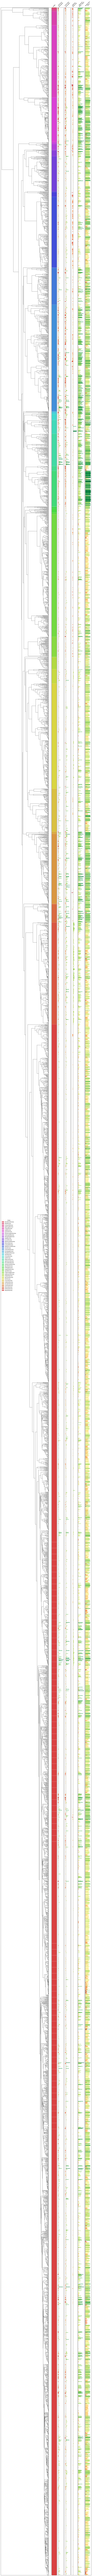

In [20]:

# --- figure ---
fig = plt.figure(figsize=(15, 0.05 * len(species_order)))
gs = fig.add_gridspec(1, len(values_of_interest)+2, width_ratios=[12, 1.2] + [1.5]*len(values_of_interest), wspace=0.05)

ax_tree = fig.add_subplot(gs[0, 0])
ax_family = fig.add_subplot(gs[0, 1], sharey=ax_tree)

orders = df["Order"].unique()

orders_all = df["Order"].values
change_positions = [
    i for i in range(1, len(orders_all))
    if orders_all[i] != orders_all[i-1]
]

import matplotlib.colors as mcolors
import random
colors = [
    mcolors.hsv_to_rgb((i/len(orders), 0.7, 0.85))
    for i in range(len(orders))
]

family_to_color = {
    fam: colors[i]
    for i, fam in enumerate(orders)
}

ax_family.barh(
    y,
    [1] * len(df),
    height=1,
    color=[family_to_color[f] for f in df["Order"]]
)

for pos in change_positions:
    ax_family.axhline(
        pos - 0.5,
        color="white",
        zorder=5,
        linewidth=0.5
    )

ax_family.set_ylim(-0.5, len(y)-0.5)
ax_family.margins(y=0)

ax_family.set_xlim(0, 1)
ax_family.set_xticks([])
ax_family.set_yticks([])
ax_family.set_title("Order", rotation=45, fontsize=10)

from matplotlib.patches import Patch

handles = [
    Patch(color=family_to_color[f], label=f)
    for f in orders
]

ax_family.legend(
    handles=handles[::-1],
    # bbox_to_anchor=(1.05, 1),
    loc=(-10, 0.5),
    fontsize=10,
    frameon=False,
    title="Order"
)


for node in tree.traverse("postorder"):
    if node.is_leaf():
        node.y = species_order.index(node.name)
        node.x = 0
    else:
        node.y = np.mean([c.y for c in node.children])
        node.x = max(c.x + c.dist for c in node.children)

# mirror X
max_x = max(n.x for n in tree.traverse())
for node in tree.traverse():
    node.x = max_x - node.x


label_space = 0.05 * max_x
ax_tree.set_xlim(-0.02 * max_x, max_x + label_space)


for node in tree.traverse():
    if not node.is_root():
        ax_tree.plot([node.x, node.up.x], [node.y, node.y],
                     color="black", lw=0.8)
        ax_tree.plot([node.up.x, node.up.x], [node.y, node.up.y],
                     color="black", lw=0.8)

ax_tree.set_ylim(-0.5, len(species_order) - 0.5)
ax_tree.invert_yaxis()
ax_tree.set_xticks([])
ax_tree.set_yticks([])

cmap = get_cmap("RdYlGn")



for i, val in enumerate(values_of_interest.keys()):
    ax_res  = fig.add_subplot(gs[0, i+2], sharey=ax_tree)
    norm_res = TwoSlopeNorm(
        vmin=df[val].min(),
        vcenter = df[val].mean(), 
        vmax=df[val].max()
    )

    ax_res.barh(
        y,
        df[val],
        height=1,
        color=cmap(norm_res(df[val]))
    )
    ax_res.axvline(0, color="black", lw=0.8)
    ax_res.set_title(values_of_interest[val], rotation=45, fontsize=10)
    ax_res.set_yticks([])
    ax_res.set_xticks([])
    ax_res.set_ylim(-0.5, len(y)-0.5)
    ax_res.margins(y=0)

plt.subplots_adjust(wspace=0.05)
plt.show()

fig.savefig(
    f"{PATH}/../results/pics/tree_all_from_innobase_clootl_tree.pdf", 
    format='pdf', 
    dpi=100,
    bbox_inches='tight'
)


In [21]:
df = df_with_2025_names_sample[
    df_with_2025_names_sample["Species"].isin(overlaping_species)
].copy()

grouped = df.copy().groupby("Order")
df.drop_duplicates(subset = "Order", inplace = True)

tree_order = Tree(f"{PATH}/tree_clootl.newick", format=1)
tree_order.prune(df["Species"].unique(), preserve_branch_length=True)
for l in tree_order.iter_leaves():
    sp = l.name
    order = df[df["Species"] == sp]["Order"].values[0]
    l.name = order

order_order = tree_order.get_leaf_names()

factor = 0.2  
for leaf in tree_order.iter_leaves():
    leaf.dist = leaf.dist * factor


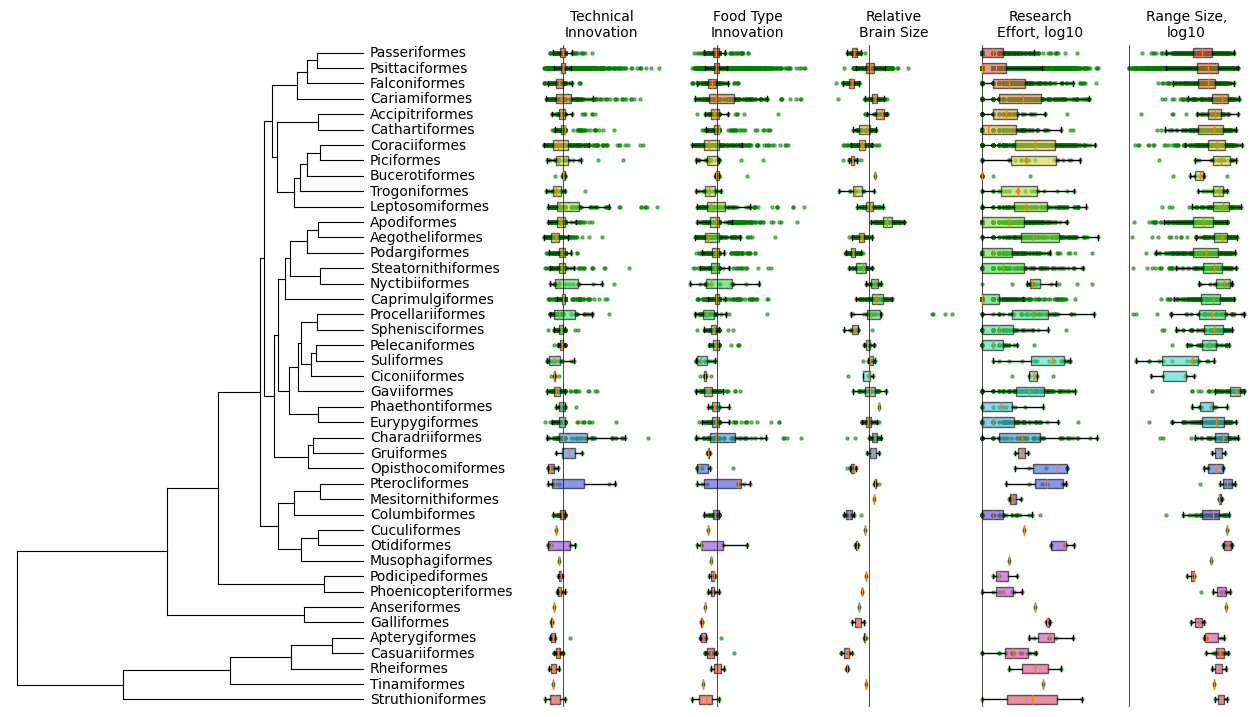

In [22]:
orders = df["Order"].drop_duplicates().tolist()
n_orders = len(orders)

y = np.arange(n_orders)

import matplotlib.colors as mcolors

colors = [
    mcolors.hsv_to_rgb((i/n_orders, 0.7, 0.85))
    for i in range(n_orders)
]

order_to_color = {
    order: colors[i]
    for i, order in enumerate(orders)
}

fig = plt.figure(figsize=(16, 0.2 * n_orders))

gs = fig.add_gridspec(
    1,
    len(values_of_interest) + 1,
    width_ratios=[4] + [1]*len(values_of_interest),
    wspace=0.1
)

ax_tree = fig.add_subplot(gs[0, 0])
ax_tree.axis('off')
for node in tree_order.traverse("postorder"):
    if node.is_leaf():
        node.y = order_order.index(node.name)
        node.x = 0
    else:
        node.y = np.mean([c.y for c in node.children])
        node.x = max(c.x + c.dist for c in node.children)

# mirror X
max_x = max(n.x for n in tree_order.traverse())
for node in tree_order.traverse():
    node.x = max_x - node.x

label_space = 0.45 * max_x
ax_tree.set_xlim(-0.02 * max_x, max_x + label_space)

for node in tree_order.traverse():
    if not node.is_root():
        ax_tree.plot([node.x, node.up.x], [node.y, node.y],
                     color="black", lw=0.8)
        ax_tree.plot([node.up.x, node.up.x], [node.y, node.up.y],
                     color="black", lw=0.8)


for sp, yy in zip(order_order, y):
    ax_tree.text(max_x + 0.02 * max_x, yy, sp,
                 va="center", fontsize=10)

ax_tree.set_ylim(-0.5, len(order_order) - 0.5)
ax_tree.invert_yaxis()
ax_tree.set_xticks([])
ax_tree.set_yticks([])

for i, val in enumerate(values_of_interest.keys()):
    ax = fig.add_subplot(gs[0, i+1], sharey=ax_tree)
    ax.axis('off')

    data = [
        grouped.get_group(order)[val].dropna()
        for order in orders
    ]

    bp = ax.boxplot(
        data,
        vert=False,
        positions=y,
        widths=0.6,
        patch_artist=True,
        showfliers=False
    )

    x_flat = []  
    y_flat = []  

    for i, (category_data, pos) in enumerate(zip(data, y)):
        x_flat.extend(category_data)
        y_flat.extend([pos] * len(category_data))

    sc = ax.scatter(x_flat, y_flat, color="green", alpha=0.5, s=5)

    for patch, order in zip(bp["boxes"], orders):
        patch.set_facecolor(order_to_color[order])
        patch.set_alpha(0.6)

    ax.set_title(values_of_interest[val], rotation=0, fontsize=10)
    ax.set_yticks([])
    ax.axvline(0, color="black", lw=0.5)

fig.savefig(
    f"{PATH}/../results/pics/tree_orders_boxplots_with_points.pdf", 
    format='pdf', 
    dpi=100,
    bbox_inches='tight'
)

fig.savefig(
    f"{PATH}/../results/pics/tree_orders_boxplots_with_points.png", 
    format='png', 
    dpi=100,
    bbox_inches='tight'
)